In [1]:
import tensorflow as tf

2024-01-20 11:02:26.412117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import keras

In [5]:
digit_mnist = keras.datasets.mnist
(X_train_full,y_train_full), (X_test,y_test)=digit_mnist.load_data()

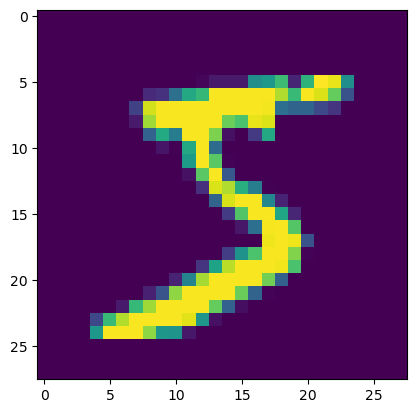

In [6]:
plt.imshow(X_train_full[0])

In [7]:
y_train_full[0]

5

In [8]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train_n=X_train_full / 255
X_test_n=X_test / 255

In [10]:
X_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_valid,X_train = X_train_n[:6000] ,X_train_n[6000:]
y_valid ,y_train=y_train_full[:6000], y_train_full[6000:]

In [13]:
import numpy as np

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model_a=keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid',activation='relu',input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(200,activation="relu"))
model_a.add(keras.layers.Dense(100,activation="relu"))
model_a.add(keras.layers.Dense(10,activation="softmax"))

In [21]:
model_b=keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid',activation='relu',input_shape=(28,28,1)))
model_b.add(keras.layers.MaxPooling2D((2,2)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200,activation="relu"))
model_b.add(keras.layers.Dense(100,activation="relu"))
model_b.add(keras.layers.Dense(10,activation="softmax"))

In [22]:
model_a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [23]:
model_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2163400   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [24]:
model_a.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])
model_b.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])

In [26]:
model_a_history=model_a.fit(X_train,y_train, epochs=60,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 23s 26ms/step - loss: 0.7108 - accuracy: 0.8136 - val_loss: 0.2884 - val_accuracy: 0.9183
Epoch 2/60
844/844 [==============================] - 29s 35ms/step - loss: 0.2684 - accuracy: 0.9213 - val_loss: 0.2214 - val_accuracy: 0.9385
Epoch 3/60
844/844 [==============================] - 29s 34ms/step - loss: 0.2104 - accuracy: 0.9370 - val_loss: 0.1763 - val_accuracy: 0.9508
Epoch 4/60
844/844 [==============================] - 25s 30ms/step - loss: 0.1754 - accuracy: 0.9475 - val_loss: 0.1485 - val_accuracy: 0.9585
Epoch 5/60
844/844 [==============================] - 28s 33ms/step - loss: 0.1510 - accuracy: 0.9550 - val_loss: 0.1335 - val_accuracy: 0.9627
Epoch 6/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.1206 - val_accuracy: 0.9665
Epoch 7/60
844/844 [==============================] - 28s 34ms/step - loss: 0.1188 - accuracy: 0.9646 - val_loss: 0.1100 - val_accuracy:

In [27]:
model_b_history=model_b.fit(X_train,y_train, epochs=60,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 39s 46ms/step - loss: 0.6632 - accuracy: 0.8300 - val_loss: 0.2805 - val_accuracy: 0.9173
Epoch 2/60
844/844 [==============================] - 38s 45ms/step - loss: 0.2632 - accuracy: 0.9226 - val_loss: 0.2175 - val_accuracy: 0.9423
Epoch 3/60
844/844 [==============================] - 43s 51ms/step - loss: 0.2059 - accuracy: 0.9392 - val_loss: 0.1770 - val_accuracy: 0.9527
Epoch 4/60
844/844 [==============================] - 34s 40ms/step - loss: 0.1708 - accuracy: 0.9492 - val_loss: 0.1476 - val_accuracy: 0.9570
Epoch 5/60
844/844 [==============================] - 33s 39ms/step - loss: 0.1461 - accuracy: 0.9564 - val_loss: 0.1353 - val_accuracy: 0.9617
Epoch 6/60
844/844 [==============================] - 33s 39ms/step - loss: 0.1282 - accuracy: 0.9624 - val_loss: 0.1186 - val_accuracy: 0.9657
Epoch 7/60
844/844 [==============================] - 33s 39ms/step - loss: 0.1141 - accuracy: 0.9668 - val_loss: 0.1092 - val_accuracy:

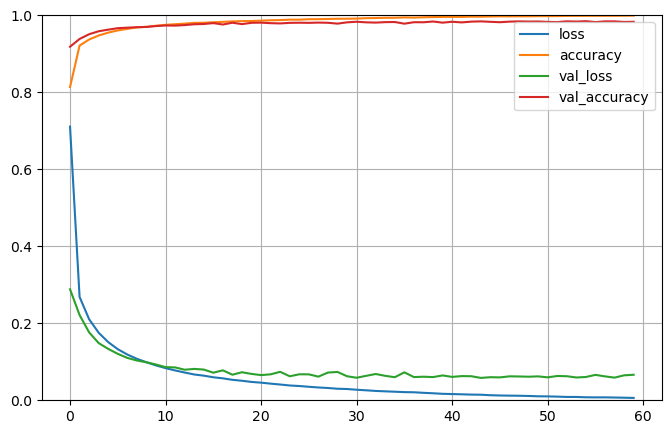

In [31]:
pd.DataFrame(model_a_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model_a.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 12.2214 - accuracy: 0.9823


[12.221404075622559, 0.9822999835014343]

In [33]:
model_b.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 11.3262 - accuracy: 0.9841


[11.3262300491333, 0.9840999841690063]

In [34]:
X_new=X_test[:5]

In [37]:
y_proba_a=model_a.predict(X_new)

1/1 [==============================] - 0s 22ms/step


In [38]:
y_proba_b=model_b.predict(X_new)

1/1 [==============================] - 0s 23ms/step


In [39]:
y_proba_a

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_proba_b

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(size=(28, 28))


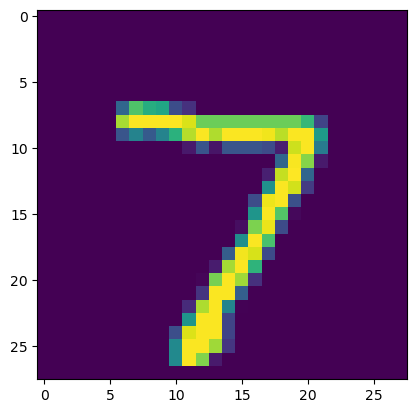

In [41]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


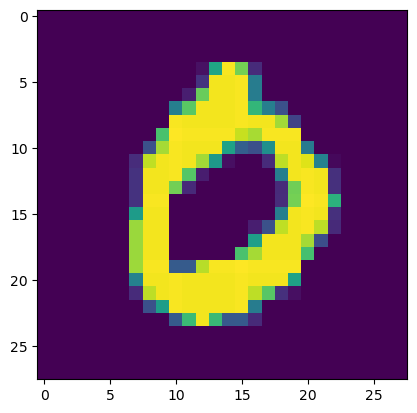

In [42]:
print(plt.imshow(X_test[3]))

In [43]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

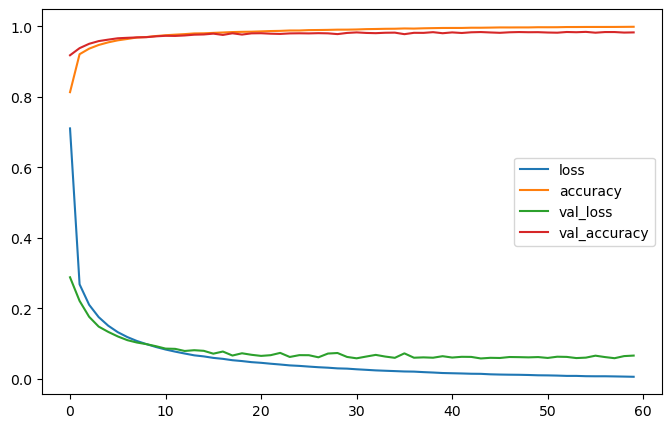

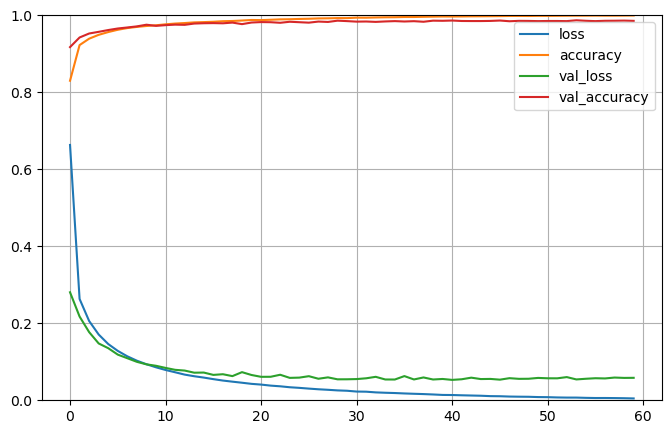

In [44]:
pd.DataFrame(model_a_history.history).plot(figsize=(8,5))
pd.DataFrame(model_b_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()